# Important imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Loading  and exploring the data

In [2]:
df = pd.read_csv('../Processed_data/Thyroid_Diff.csv',sep=',')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


## Calculate the correlation matrix

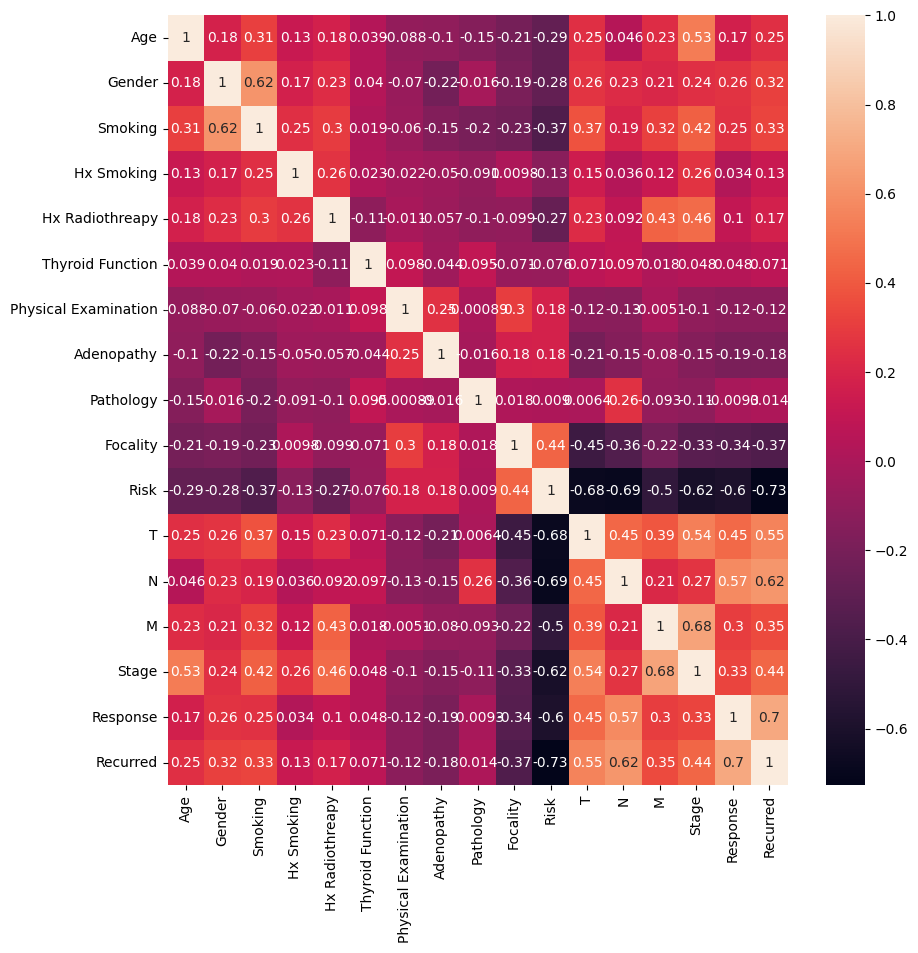

In [3]:
# Calaculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [4]:
# show the correlation between features and the target variable (Recurred)
features = corr_matrix['Recurred'].sort_values(ascending=False)
features

Recurred                1.000000
Response                0.702864
N                       0.624538
T                       0.553318
Stage                   0.444569
M                       0.351161
Smoking                 0.325300
Gender                  0.317731
Age                     0.248926
Hx Radiothreapy         0.171796
Hx Smoking              0.128472
Thyroid Function        0.071077
Pathology               0.014230
Physical Examination   -0.122076
Adenopathy             -0.182313
Focality               -0.368581
Risk                   -0.727404
Name: Recurred, dtype: float64

In [5]:
# Select the features with correlation greater than 0.3
selected_features = features[ (features > 0.3) | (features < -0.3) ]
selected_features

Recurred    1.000000
Response    0.702864
N           0.624538
T           0.553318
Stage       0.444569
M           0.351161
Smoking     0.325300
Gender      0.317731
Focality   -0.368581
Risk       -0.727404
Name: Recurred, dtype: float64

In [6]:
selected_features_names = selected_features.index
selected_features_names

Index(['Recurred', 'Response', 'N', 'T', 'Stage', 'M', 'Smoking', 'Gender',
       'Focality', 'Risk'],
      dtype='object')

## Define the features and target variable

In [7]:
df = df[selected_features_names]

X = df.drop('Recurred',axis=1)
y = df['Recurred']

## Split the data into training and testing sets

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Hyperparameter Tuning of an SVM Model with a Pipeline and GridSearchCV

In [12]:
# Create a pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear']
}

# Set up cross-validation with GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)




## Fit the model

In [13]:

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [1, 0.1, 0.01, 0.001],
                         'svm__kernel': ['rbf', 'linear']},
             verbose=3)

## Calculate the accuracy of the model

In [14]:
# Best parameters from GridSearch
print("Best parameters found: ", grid_search.best_params_)

# Predictions and evaluation on the test set
y_pred = grid_search.predict(X_train)
y_pred2 = grid_search.predict(X_test)



print("Train Accuracy: ", accuracy_score(y_train, y_pred)*100)
print("Test Accuracy: ", accuracy_score(y_test, y_pred2)*100)


Best parameters found:  {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Train Accuracy:  96.06299212598425
Test Accuracy:  97.27272727272728
